In [ ]:
###### Lista de bibliotecas #####
# Numpy: biblioteca de calculo numerico do python
# pandas: biblioteca para operação sobre dados tabulares
# matplotlib: biblioteca para plotar gráficos
# seaborn: biblioteca de alto nível para plotar gráficos baseados no matplotlib
# yahooquery: biblioteca para consultar dados do Yahoo Finance

###### Instalação de bibliotecas #####
# Use o seguinte comando: !pip install <nome_biblioteca>
# Exemplo: !pip install yahooquery

In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from yahooquery import Ticker

In [25]:
# Definir uma lista de simbolos (ações) de interesse
symbols_list = ['AMZN', 'WMT']
# Criar um objeto Ticker (para fazer o download de dados de cotação de ações)
tc = Ticker(symbols_list)
# Fazer o download de dados de um período de 60 dias, com intervalor de 1d entre cada medição
# Lista de períodos e intervalos possíveis: https://yahooquery.dpguthrie.com/guide/ticker/historical/
df = tc.history(period='10d', interval="1d")
# Mostrar os primeiros 5 registros do dataframe df
df = df['close']
df.head()

symbol  date      
AMZN    2021-02-03    3312.530029
        2021-02-04    3331.000000
        2021-02-05    3352.149902
        2021-02-08    3322.939941
        2021-02-09    3305.000000
Name: close, dtype: float64

In [14]:
# Converter o índice (multi-nível) em colunas
df_reset = df.reset_index()
df_reset.head()

,symbol,date,close
0,AMZN,2020-10-08,3190.550049
1,AMZN,2020-10-09,3286.649902
2,AMZN,2020-10-12,3442.929932
3,AMZN,2020-10-13,3443.629883
4,AMZN,2020-10-14,3363.709961


In [15]:
# Criar uma nova coluna com a data do dia anterior
df_reset['ontem'] = df_reset['date'].apply(lambda x: x + datetime.timedelta(days=1))
df_reset

,symbol,date,close,ontem
0,AMZN,2020-10-08,3190.550049,2020-10-09
1,AMZN,2020-10-09,3286.649902,2020-10-10
2,AMZN,2020-10-12,3442.929932,2020-10-13
3,AMZN,2020-10-13,3443.629883,2020-10-14
4,AMZN,2020-10-14,3363.709961,2020-10-15
...,...,...,...,...
175,WMT,2021-02-10,144.130005,2021-02-11
176,WMT,2021-02-11,144.020004,2021-02-12
177,WMT,2021-02-12,144.470001,2021-02-13
178,WMT,2021-02-16,145.660004,2021-02-17


In [16]:
# Realizar um merge da data atual com a data do dia anterior
df_merge = df.merge(right=df_reset, left_on=['symbol','date'], right_on=['symbol','ontem'], suffixes=["", "_ontem"])
df_merge.head()

,symbol,close,date,close_ontem,ontem
0,AMZN,3286.649902,2020-10-08,3190.550049,2020-10-09
1,AMZN,3443.629883,2020-10-12,3442.929932,2020-10-13
2,AMZN,3363.709961,2020-10-13,3443.629883,2020-10-14
3,AMZN,3338.649902,2020-10-14,3363.709961,2020-10-15
4,AMZN,3272.709961,2020-10-15,3338.649902,2020-10-16


In [21]:
# Calcular a diferença percentual de um dia para o outro
# (v_hoje - v_ontem ) / v_ontem
df_merge['change_pct'] = (df_merge['close'] - df_merge['close_ontem']) / df_merge['close_ontem']
df_merge

,symbol,close,date,close_ontem,ontem,change_pct
0,AMZN,3286.649902,2020-10-08,3190.550049,2020-10-09,0.030120
1,AMZN,3443.629883,2020-10-12,3442.929932,2020-10-13,0.000203
2,AMZN,3363.709961,2020-10-13,3443.629883,2020-10-14,-0.023208
3,AMZN,3338.649902,2020-10-14,3363.709961,2020-10-15,-0.007450
4,AMZN,3272.709961,2020-10-15,3338.649902,2020-10-16,-0.019750
...,...,...,...,...,...,...
133,WMT,145.830002,2021-02-08,145.029999,2021-02-09,0.005516
134,WMT,144.130005,2021-02-09,145.830002,2021-02-10,-0.011657
135,WMT,144.020004,2021-02-10,144.130005,2021-02-11,-0.000763
136,WMT,144.470001,2021-02-11,144.020004,2021-02-12,0.003125


In [22]:
df_pivot = df_merge.pivot('date', 'symbol', 'change_pct')
df_pivot

symbol,AMZN,WMT
date,,
2020-10-08,0.030120,0.010045
2020-10-12,0.000203,0.013726
2020-10-13,-0.023208,-0.015660
2020-10-14,-0.007450,0.004099
2020-10-15,-0.019750,0.001245
...,...,...
2021-02-08,-0.005399,0.005516
2021-02-09,-0.005573,-0.011657
2021-02-10,-0.007439,-0.000763


In [23]:
df_pivot.corr()

symbol,AMZN,WMT
symbol,,
AMZN,1.000000,0.354836
WMT,0.354836,1.000000


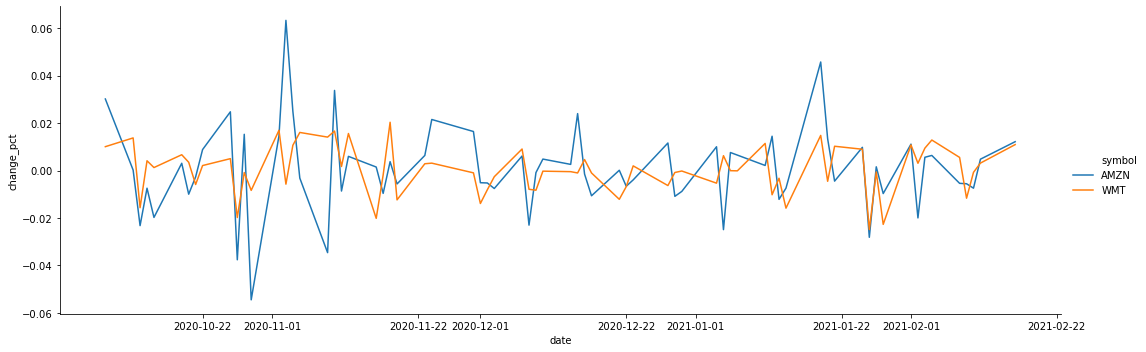

In [24]:
# Curiosidade: Plotar o gráfico da variação da cotação diária
import seaborn as sns
# Plotar um gráfico de linhas
# data: dataframe com os dados
# kind: tipo do grafico de relacionamento. Opções: scatter e line
# x: nome da coluna a ser plotada no eixo x
# y: nome da coluna a ser plotada no eixo y
# hue: coluna de agregação, cujas séries serão representadas por cores distintas.
sns.relplot(data=df_merge, kind='line', aspect=3, x='date', y='change_pct', hue='symbol')
